In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import copy
from datetime import datetime
import csv

In [2]:
def filtrar_datos(file_path, dataset_name, lista_num_clases):
    # Leer el CSV
    df = pd.read_csv(file_path)
    
    # Filtrar por número de textos y palabras
    df_filtrado = df[df['Dataset'] == dataset_name]
    
    # Filtrar por lista de números de clases
    #df_filtrado = df_filtrado[df_filtrado['Num Classes'].isin(lista_num_clases)]
    
    # Seleccionar el registro con el mayor accuracy para cada combinación de Model Name y Num Classes
    idx = df_filtrado.groupby(['Model Name', 'Num Classes'])['Accuracy'].idxmax()
    df_max_accuracy = df_filtrado.loc[idx]
    
    # Ordenar por Num Classes
    df_ordenado = df_max_accuracy.sort_values(by='Num Classes')
    
    # Crear la lista de diccionarios en el formato requerido
    datos = []
    for _, row in df_ordenado.iterrows():
        datos.append({
            "nombre": row['Model Name'],
            "num_classes": row['Num Classes'],
            "accuracy": row['Accuracy']
        })
    
    return datos

# Parámetros de ejemplo
file_path = 'Results/ModelResults.csv'
dataset_name = "20000 texts"
lista_num_clases = [20, 46, 94]

# Obtener los datos filtrados y formateados
datos_filtrados = filtrar_datos(file_path, dataset_name, lista_num_clases)

# Mostrar el resultado
datos_por_nombre_2 = {}
for dato in datos_filtrados:
    nombre = dato["nombre"]
    if nombre not in datos_por_nombre_2:
        datos_por_nombre_2[nombre] = {"num_classes": [], "accuracy": []}
    datos_por_nombre_2[nombre]["num_classes"].append(dato["num_classes"])
    datos_por_nombre_2[nombre]["accuracy"].append(dato["accuracy"])

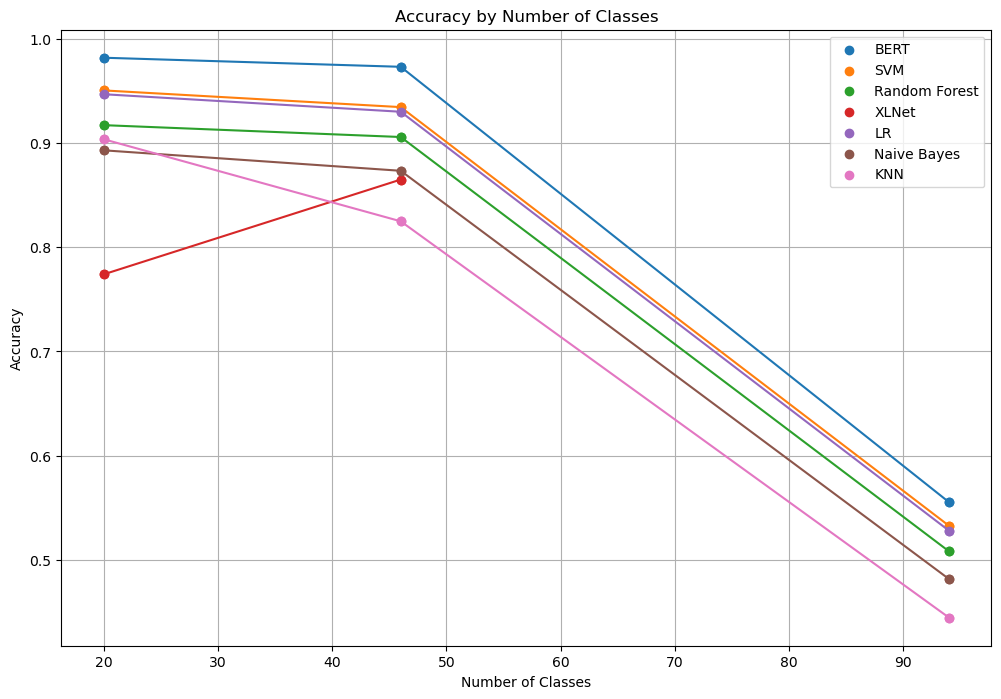

In [3]:
plt.figure(figsize=(12, 8))
for nombre, datos in datos_por_nombre_2.items():
    plt.scatter(datos["num_classes"], datos["accuracy"], label=nombre)
    plt.plot(datos["num_classes"], datos["accuracy"], linestyle='-', marker='o')

plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Classes')
plt.legend()
plt.grid(True)
plt.show()